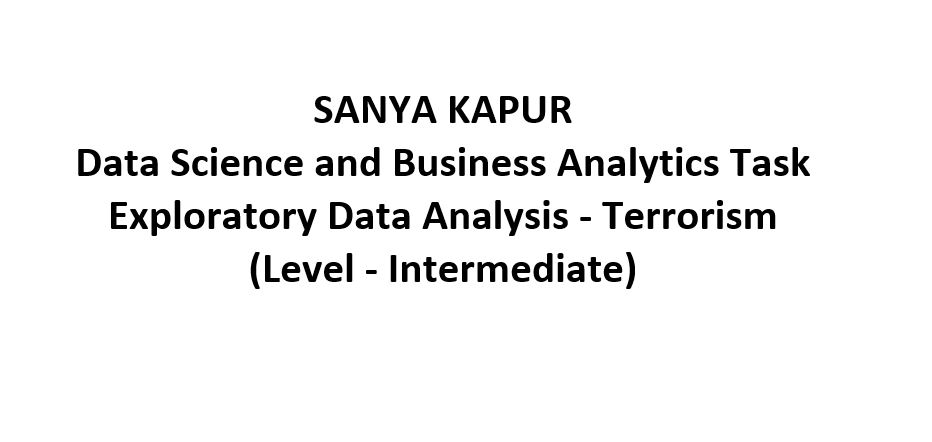

In [2]:
from IPython.display import Image
Image("grip.JPG")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
from ipywidgets import interact

In [4]:
#Reading dataset and catching glimpse of it
df=pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
pd.set_option('max_columns', 135)
df.head()

C:\Users\I514369\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [5]:
#getting dimensions of the dataframe
df.shape

(181691, 135)

In [6]:
#keeping relevant data columns and dropping the rest
df_v1=df.copy()
df=df[['iyear', 'imonth', 'iday','extended', 'country_txt', 
       'region_txt', 'city', 'success', 'suicide', 
       'targtype1_txt', 'gname', 'weaptype1_txt']]
df.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,suicide,targtype1_txt,gname,weaptype1_txt
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Journalists & Media,Unknown,Unknown
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Government (Diplomatic),Unknown,Explosives
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Government (Diplomatic),Unknown,Incendiary


In [7]:
#calculating rows with invalid/NaN values
df.isna().mean()

iyear            0.000000
imonth           0.000000
iday             0.000000
extended         0.000000
country_txt      0.000000
region_txt       0.000000
city             0.002389
success          0.000000
suicide          0.000000
targtype1_txt    0.000000
gname            0.000000
weaptype1_txt    0.000000
dtype: float64

In [8]:
#Dropping rows with missing values
df.dropna(axis=0, how='any', inplace=True)

In [9]:
#renaming columns to be more readable
df.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday':'day', 'country_txt':'country',
                  'region_txt':'region', 'targtype1_txt':'target', 'gname':'group', 'weaptype1_txt':'weapon'}, inplace=True)
df.head()

,year,month,day,extended,country,region,city,success,suicide,target,group,weapon
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Journalists & Media,Unknown,Unknown
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Government (Diplomatic),Unknown,Explosives
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Government (Diplomatic),Unknown,Incendiary


In [11]:
#getting quick insights of the dataset
df.describe(include='all')

,year,month,day,extended,country,region,city,success,suicide,target,group,weapon
count,181257.000000,181257.000000,181257.000000,181257.000000,181257,181257,181257,181257.000000,181257.000000,181257,181257,181257
unique,NaN,NaN,NaN,NaN,205,12,36674,NaN,NaN,22,3535,12
top,NaN,NaN,NaN,NaN,Iraq,Middle East & North Africa,Unknown,NaN,NaN,Private Citizens & Property,Unknown,Explosives
freq,NaN,NaN,NaN,NaN,24620,50444,9775,NaN,NaN,43315,82444,92292
mean,2002.624599,6.466779,15.504665,0.045328,NaN,NaN,NaN,0.889488,0.036550,NaN,NaN,NaN
std,13.271843,3.388787,8.814744,0.208023,NaN,NaN,NaN,0.313527,0.187655,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN


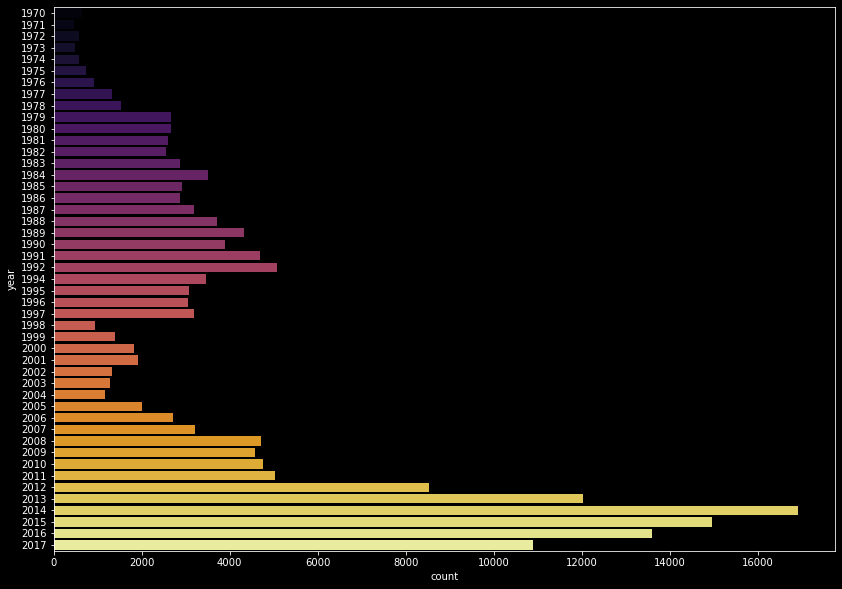

In [12]:
#plotting to understand number of attacks per year
plt.rcParams['figure.figsize']=14,10
sns.countplot(y=df['year'], palette='inferno')
plt.show() 

In [13]:
#visualizing attacks with respect to regions per year
@interact

def attack_year(year=list(df['year'].unique())):
    a = df[df['year']==year]
    return sns.countplot(y=a['region'], palette='viridis')

interactive(children=(Dropdown(description='year', options=(1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 19…

In [14]:
#visualizing attacks with respect to regions per country

@interact
def country_name(region=list(df['region'].unique())):
    a=df[(df['region']==region)]
    a=pd.DataFrame(a['country'].value_counts())
    return a.style.background_gradient(cmap='plasma')

interactive(children=(Dropdown(description='region', options=('Central America & Caribbean', 'North America', …

In [15]:
#visualizing attacks with respect to countries per weapon

@interact
def weapon_type(country=list(df['country'].unique())):
    a=df[df['country']==country]
    a=pd.DataFrame(a['weapon'].value_counts())
    return a.style.background_gradient(cmap='plasma')

interactive(children=(Dropdown(description='country', options=('Dominican Republic', 'Mexico', 'Philippines', …

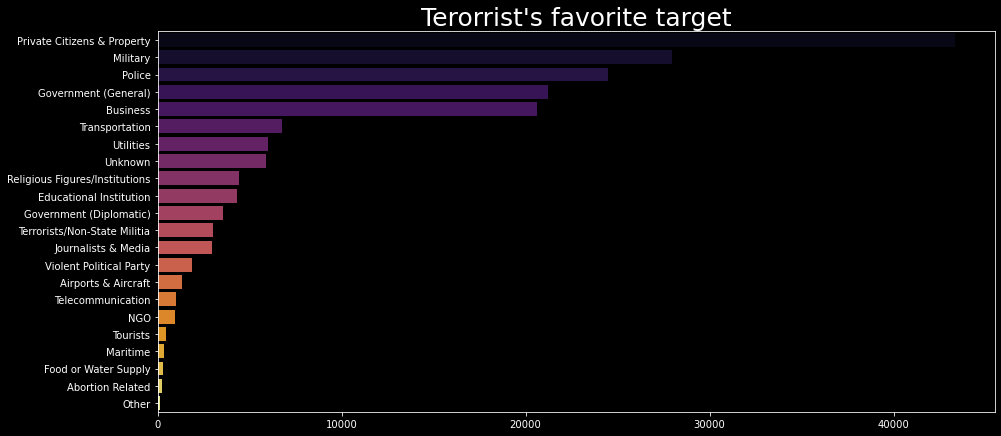

In [16]:
#visualizing to see the most attacked entity
plt.rcParams['figure.figsize']=15,7
sns.barplot(x=df.target.value_counts().values, y=df.target.value_counts().index, palette='inferno')
plt.title('Terorrist\'s favorite target', fontsize=25)
plt.show()

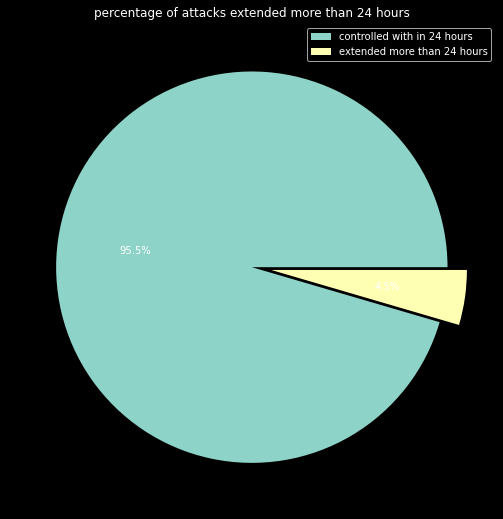

In [17]:
#visualizing to see ratio of attacks that were controlled and attacks that carried on further
plt.rcParams['figure.figsize']=(9,9)
explode = (0, 0.1)
labels=['controlled with in 24 hours','extended more than 24 hours']
plt.pie(df['extended'].value_counts(), explode=explode, autopct='%1.1f%%')
plt.title('percentage of attacks extended more than 24 hours')
plt.legend(labels, fontsize=10)
plt.show()

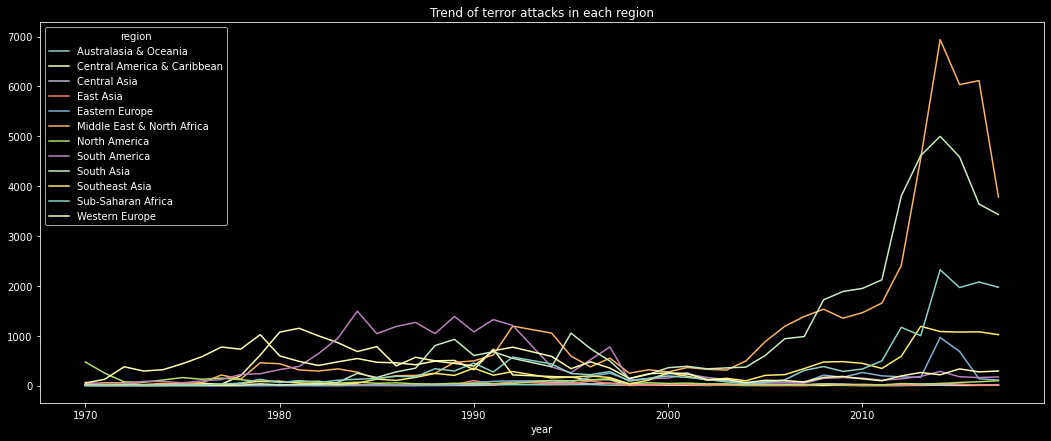

In [18]:
#Trend of attacks in each region
plt.rcParams['figure.figsize']=18,7
terror_area=pd.crosstab(df.year,df.region)
terror_area.plot()
plt.title('Trend of terror attacks in each region')
plt.show()

In [1]:
#Story board tableau
from IPython.display import IFrame
IFrame('https://public.tableau.com/views/GlobalTerrorismExploratoryDataAnalysis-Kaggle/TargetDashboard?:embed=y&:display_count=yes', width=1000, height=930)